# Mini-Lab: Logistic Regression and SVMs

## Names:
David Samuel
James Hancock
Alexandra Fisher
Remy Lagrois

This notebook will illustrate tools used for classification of the MNIST handwritten digits data set.  

We will first split the training data into testing and training objects using sklearn, then scale the data, and analyze weights using logistic regression.  We will then use support vector machines using a linear kernel and compare the speed and accuracy of each of these classification methods. 

# The Business Justification
 This data was collected in order to train a prediction algorithm to correctly identify handwritten digits from 0 to 9 from the MNIST training set.  The data was sourced from Kaggle’s Digit Recognizer competition at the following site: https://www.kaggle.com/c/digit-recognizer/data.  The objective of the competition is to build a fast and effective process for classifying and identifying handwritten characters using computer image processing, and machine learning. By measuring the percentage correctly predicted from the test set, we can gauge the effectiveness of the algorithm.  Achieving a 95% or above accuracy is considered a success rate. Since Kaggle is an open project competition, it fosters various types of collaboration and algorithm benchmarking, this is a  great way to enhance our Data Science learning.
    hand written digit recognition has numerous applications in computer vision.  Banks use automatic cashing of hand written checks, sorting mail by zipcode, and potentially reconstructing shredded files.  Further research into handwritten alphabet recognition has lead to novel advancements such as Google Maps' use of gps and streetview images of actual home address numbers to locate street addresses.

# The Data
There are 2 data sets to work with, the first being the training set, and the second, smaller test set. The training set is comprised of 42,000 rows each representing handwritten digits with 784 pixels or 28 pixels squared.  The training set also includes a label for each observation.  The pixel columns are indexed from pixel0 to pixel783 as a minified RGB value; ordinal measures of color between 0 and 255 inclusive.  Because these images are greyscale, all red, green, and blue values are equal to the same ordinal number.  A solid black, for example, would have an (R,G,B) value of (0, 0, 0), and to conserve memory, this value is stored as a singleton pixel equal to (0).  In contrast, white holds a value of (255); and greyscale is an integer value anywhere in this range.  Each row is identified by the first column “label”, which is a nominal integer value, 0 through 9; these are the 10 classes of digits contained in the set.  These labels will be used as class variables for training.  
    The test data set is 28,000 rows, with labels omitted, and independent of the the training data.

Loading the data. Due to the extremely large amount of dimensions involved in this data set, it was decided to reduce the volume of rows to only 1000. This is due to the fact that a logistic regression will perfrom a lot of functions within memory.

In [1]:
import pandas as pd
import numpy as np
from __future__ import print_function


df = pd.read_csv('data/train.csv', nrows=1000) 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 6.0 MB


# As shown in the data description below, the 1000 row sample of the data does appear to be sufficient as the mean, and standard deviation are very similar to that of Assignement #1

In [2]:
df['label'].describe().transpose()

count    1000.000000
mean        4.401000
std         2.888692
min         0.000000
25%         2.000000
50%         4.000000
75%         7.000000
max         9.000000
Name: label, dtype: float64

# Logistic Regression
The logistic regression is designed to help predict a binary outcome on a categorical data set. For the data set used the categories will consist of the general pixel positions of the handwritten letter data.

The below code is used to get the correct labels for each of the variables of the data set, as well as assure that the X and Y axes are representive of the data model for plotting purposes. A Shufflesplit is also perfromed on the data set, in order to split data into training and test sets.

In [3]:
from sklearn.cross_validation import ShuffleSplit

if 'label' in df:
    y = df['label'].values
    del df['label'] 
    X = df.values 

num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(n=num_instances,
                         n_iter=num_cv_iterations,
                         test_size  = 0.2)
                         
print(cv_object)

ShuffleSplit(1000, n_iter=3, test_size=0.2, random_state=None)


Below a logistic regression is run with two variations included in order to assure that the randomized sample used in each interation was representitive of the sample. Within the logistic regression the train indices are defined as well as the accuracy scores for each iteration. 

The two iterations present a 83% and 81.5% respectively. Meaning that the two iterations are fairly similar in nature to one another.

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
lr_clf = LogisticRegression(penalty='l2', C=1.0, class_weight=None)



iter_num=0
for train_indices, test_indices in cv_object: 
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]

    lr_clf.fit(X_train,y_train) 
    y_hat = lr_clf.predict(X_test) 

    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print("confusion matrix\n",conf)
    iter_num+=1

====Iteration 0  ====
accuracy 0.83
confusion matrix
 [[24  0  0  1  0  0  2  0  0  0]
 [ 0 12  0  0  0  0  0  0  1  0]
 [ 0  0 24  1  0  0  1  1  0  2]
 [ 0  0  0 14  0  0  0  1  2  1]
 [ 0  0  0  0 16  0  0  0  1  4]
 [ 1  0  0  0  0 17  1  1  3  1]
 [ 0  0  0  0  0  0 17  0  0  0]
 [ 0  0  0  0  2  0  1 17  0  0]
 [ 0  1  0  0  0  1  0  0 14  1]
 [ 0  0  1  1  0  0  0  1  0 11]]
====Iteration 1  ====
accuracy 0.76
confusion matrix
 [[15  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  1  0  0  1]
 [ 2  1 22  2  0  0  1  1  0  1]
 [ 0  0  0 12  0  0  0  0  0  1]
 [ 0  0  0  0 15  0  0  1  1 10]
 [ 1  1  0  0  0 13  2  0  3  0]
 [ 0  0  1  0  0  0 16  0  1  0]
 [ 0  1  0  0  1  0  0 17  0  0]
 [ 0  1  1  2  0  3  0  0 11  2]
 [ 0  0  0  1  2  1  0  0  1 13]]
====Iteration 2  ====
accuracy 0.825
confusion matrix
 [[11  0  0  0  0  0  0  0  0  0]
 [ 0 25  0  0  0  0  0  0  0  1]
 [ 0  1 20  0  1  0  1  0  0  0]
 [ 0  0  2 19  0  2  0  0  0  0]
 [ 0  0  0  0 17  0  0  2  0  1]
 [ 0  0  0

The below logistic regression is the same test with just a shorter code set. The accuracies listed in the output below are also very similar to those we recieved from the previous problem.

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt

import time
start = time.time()

lr_clf = LogisticRegression(penalty='l2', C=1.0, class_weight=None) 
from sklearn.cross_validation import cross_val_score
accuracies = cross_val_score(lr_clf, X, y=y, cv=cv_object) 
print('time: ', time.time()-start)
print(accuracies)

time:  1.46399998665
[ 0.81   0.805  0.805]


Below is a widget that helps one determine the various accuracy percentages given various levels of cost. We can see that the accuracy stays reletively constant, except that the accuracy goes down as the cost is lowered on the slider.

In [6]:
from ipywidgets import widgets as wd

def lr_explor(cost):
    lr_clf = LogisticRegression(penalty='l2', C=cost, class_weight=None)
    accuracies = cross_val_score(lr_clf,X,y=y,cv=cv_object) 
    print(accuracies)

wd.interact(lr_explor,cost=(0.001,5.0,0.05))

[ 0.83   0.785  0.825]


<function __main__.lr_explor>

Below a standard scaler is run. The standard scaler is designed to standardize features by removing the mean and scaling to unit variance. Due to the fact that this data set has a very large amount of elements the findings from this test will be fairly ambiguous, however it is important to note that the values do step down when moving down the scale.

In [7]:
from sklearn.preprocessing import StandardScaler

# scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train) # find scalings for each column that make this zero mean and unit std
# the line of code above only looks at training data to get mean and std and we can use it 
# to transform new feature data

X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) # apply those means and std to the test set (without snooping at the test set values)

# train the model just as before
lr_clf = LogisticRegression(penalty='l2', C=0.05) # get object, the 'C' value is less (can you guess why??)
lr_clf.fit(X_train_scaled,y_train)  # train object

y_hat = lr_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf )

# sort these attributes and spit them out
zip_vars = zip(lr_clf.coef_.T,df.columns) # combine attributes
# zip_vars.sort(key = lambda t: np.abs(t[0])) # sort them by the magnitude of the weight
for coef, name in zip_vars:
    print(name, 'has weight of', coef[0]) # now print them out

C:\Anaconda2\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Anaconda2\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Anaconda2\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


accuracy: 0.78
[[11  0  0  0  0  0  0  0  0  0]
 [ 0 23  0  1  0  0  0  0  1  1]
 [ 0  0 20  1  1  0  0  1  0  0]
 [ 0  0  3 18  0  1  0  1  0  0]
 [ 0  0  1  1 17  0  0  0  0  1]
 [ 0  1  0  2  0 11  1  0  0  0]
 [ 1  0  2  0  3  0 20  0  1  0]
 [ 1  2  0  0  0  0  0 15  0  3]
 [ 2  0  1  1  0  1  1  0  9  0]
 [ 0  1  1  0  1  0  1  3  0 12]]
pixel0 has weight of 0.0
pixel1 has weight of 0.0
pixel2 has weight of 0.0
pixel3 has weight of 0.0
pixel4 has weight of 0.0
pixel5 has weight of 0.0
pixel6 has weight of 0.0
pixel7 has weight of 0.0
pixel8 has weight of 0.0
pixel9 has weight of 0.0
pixel10 has weight of 0.0
pixel11 has weight of 0.0
pixel12 has weight of 0.0
pixel13 has weight of 0.0
pixel14 has weight of 0.0
pixel15 has weight of 0.0
pixel16 has weight of 0.0
pixel17 has weight of 0.0
pixel18 has weight of 0.0
pixel19 has weight of 0.0
pixel20 has weight of 0.0
pixel21 has weight of 0.0
pixel22 has weight of 0.0
pixel23 has weight of 0.0
pixel24 has weight of 0.0
pixel25 has we

Now it is time to plot the weights to show where the numbers might lie in determination of which attributes are most important when predicting. As stated presviouly this data set is a little odd in determination of variable selection however we can see that the pixels in the middle of the data set, show to a much greater extent where the possible future values may lie.

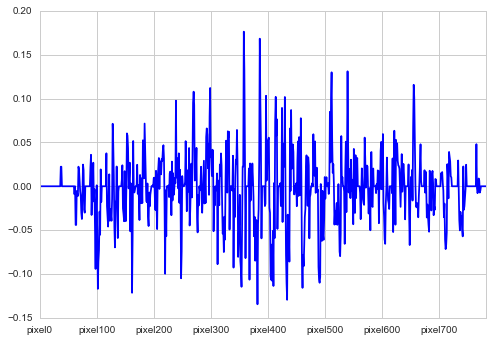

In [8]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)


weights = pd.Series(lr_clf.coef_[0],index=df.columns)
sns = weights.plot(color = "blue")

Below a pipeline is used to help to a greater extent which values are the largest deterininents. A pipline essentially applies a list of transforms along with a final estimator. The final estimator only needs to implement fit. From this we can determine which of the variables is most vital for model creation. As shown in the output the values toward the middle of the pixel scale appear to be the most likely determininents which is to be expected as most of the items would be drawn centered arond the middle of the box.

C:\Anaconda2\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Anaconda2\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Anaconda2\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Anaconda2\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Anaconda2\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConv

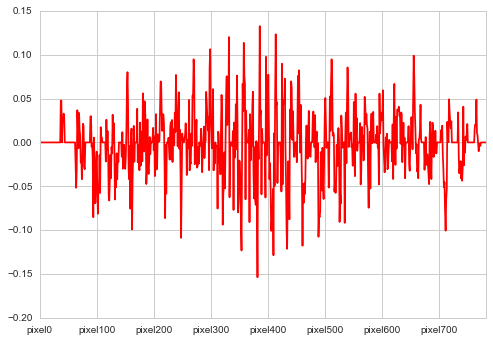

In [9]:
# Ignore warnings


from sklearn.pipeline import Pipeline
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

std_scl = StandardScaler()
lr_clf = LogisticRegression(penalty='l2', C=0.05) 

piped_object = Pipeline([('scale', std_scl), ('logit_model', lr_clf)])

for iter_num, (train_indices, test_indices) in enumerate(cv_object):
    piped_object.fit(X[train_indices],y[train_indices])  
    
trained_model_from_pipeline = piped_object.named_steps['logit_model']

weights = pd.Series(trained_model_from_pipeline.coef_[0],index=df.columns)
sns = weights.plot(color = "red")

# Support Vector Machines¶
Scaled attributes from the training and testing data are now used for investigating associated weights and support vectors. This is done by using support vector machines (SVMs) on the data and playing with the parameters.

In [10]:
# Use Pandas to import as a data frame
import pandas as pd

train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

As shown below we must (as we did with the logit) seperate the variables using a Shuffle Split.

In [11]:
from sklearn.cross_validation import ShuffleSplit

# Create training set and cross validation set
# Use 50% of data for cross validation
# dftrain, dfcross = train_test_split(train, test_size = 0.5)

# Set X and y
X = train.values
y = train['label'].values

num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(n=num_instances,
                         n_iter=num_cv_iterations,
                         test_size  = 0.2)
print(cv_object)

ShuffleSplit(42000, n_iter=3, test_size=0.2, random_state=None)


As shown below there was a command created to ensure that there are no duplicate rows in the data source.

In [12]:
# Check Data 

print ("Checking for Null values or duplicate rows... "), 
if train.isnull().all().any() or train.duplicated().all(): 
    print('error in data')
else:
    print('None found')

Checking for Null values or duplicate rows... 
None found


The below code sets the indices and variables as the X and Y variables for visualization purposes.

In [13]:
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

scl_obj = StandardScaler()


print("Setting training and testing indices..."),
for train_indices, test_indices in cv_object: 
    
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
print("Scaling..."),    
scl_obj.fit(X_train) 

X_train_scaled = scl_obj.transform(X_train) 
X_test_scaled = scl_obj.transform(X_test) 
    
X_train_scaled = scl_obj.transform(X_train) 
X_test_scaled = scl_obj.transform(X_test)

print("Done.")

Setting training and testing indices...
Scaling...
Done.


Below the code creates a the model for the actual support vetors, in order to perfrom the support vector model the data set must first be scaled to support the variables.

In [14]:
import time
start = time.time()

from sklearn.svm import SVC
from sklearn import metrics as mt


svm_clf = SVC(C=0.5, kernel='linear', degree=3, gamma='auto')
print("Training..."), 
svm_clf.fit(X_train_scaled, y_train) 

print("Predicting..."), 
y_hat = svm_clf.predict(X_test_scaled) 

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('time: ', time.time()-start)
print('accuracy:', acc )
print(conf)

Training...
Predicting...
time:  160.161999941
accuracy: 0.979047619048
[[821   1   2   0   0   0   0   0   0   0]
 [  1 954   9   0   1   0   0   0   0   0]
 [  7   6 799  10   4   0   0   0   0   0]
 [  3   3  14 837   1   0   0   0   0   0]
 [  0   3   6   4 816   2   4   2   0   0]
 [  0   1   0   2   9 750  14   2   0   0]
 [  0   0   0   0   2   8 822   0   1   0]
 [  0   0   0   0   2   2   1 890   3   0]
 [  0   0   0   0   1   0  13   9 769  12]
 [  0   0   0   0   1   0   1   2   7 766]]


## The seaborn plot below shows the weights for each pixel; with large concentrations in the center and bottom of the images

[[-0.04938634  0.          0.         ...,  0.          0.          0.        ]
 [-0.78064432  0.          0.         ...,  0.          0.          0.        ]
 [-0.65964825  0.          0.         ...,  0.          0.          0.        ]
 ..., 
 [-0.86906902  0.          0.         ...,  0.          0.          0.        ]
 [-2.89277184  0.          0.         ...,  0.          0.          0.        ]
 [-2.86149529  0.          0.         ...,  0.          0.          0.        ]]


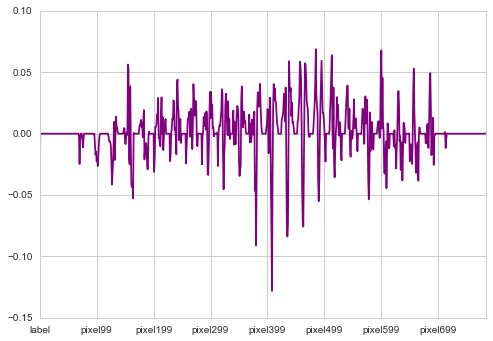

In [23]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)


print(svm_clf.coef_)
weights = pd.Series(svm_clf.coef_[0],index=train.columns)

sns = weights.plot(color = "purple")


### The plot above shows a high concentration of vectors in pixels 300-500
This as stated previously with the logit, shows that a majority of the pixels are towards the middle of the square, meaning that most of the drawings start near the 300pixel- 500pixel range. 

In [16]:
# The support vectors
print(svm_clf.support_vectors_.shape)
print(svm_clf.support_.shape)
print(svm_clf.n_support_ )

(6657L, 785L)
(6657L,)
[382 311 707 833 604 787 478 751 905 899]


In [17]:
df_tested_on = train.iloc[train_indices] 

df_support = df_tested_on.loc[svm_clf.support_,:]

df_support['label'] = y[svm_clf.support_] 

train['label'] = y 

df_support.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6657 entries, 6 to 33552
Columns: 785 entries, label to pixel783
dtypes: float64(784), int64(1)
memory usage: 39.9 MB


In [21]:
# use some compact notation for creating a linear SVM classifier with stochastic descent
from sklearn.linear_model import SGDClassifier
start = time.time()

regularize_const = 0.1
iterations = 5
svm_sgd = SGDClassifier(alpha=regularize_const,
        fit_intercept=True, l1_ratio=0.0, learning_rate='optimal',
        loss='hinge', n_iter=iterations, n_jobs=-1, penalty='l2')

scl = StandardScaler()
for train_idx, test_idx in cv_object:
    svm_sgd.fit(scl.fit_transform(X[train_idx]),y[train_idx])
    yhat = svm_sgd.predict(scl.transform(X[test_idx]))
    
    conf = mt.confusion_matrix(y[test_idx],yhat)
    acc = mt.accuracy_score(y[test_idx],yhat)
print('time: ', time.time()-start)
print('SVM:', acc)

time:  8.81399989128
SVM: 0.899285714286


In [20]:
# use some compact notation for creating a logistic regression classifier with stochastic descent
start = time.time()
log_sgd = SGDClassifier(alpha=regularize_const,
        fit_intercept=True, l1_ratio=0.0, learning_rate='optimal',
        loss='log', n_iter=iterations, n_jobs=-1, penalty='l2')

scl = StandardScaler()
for train_idx, test_idx in cv_object:
    log_sgd.fit(scl.fit_transform(X[train_idx]),y[train_idx])
    yhat = log_sgd.predict(scl.transform(X[test_idx]))
    
    conf = mt.confusion_matrix(y[test_idx],yhat)
    acc = mt.accuracy_score(y[test_idx],yhat)
print('time: ', time.time()-start)
print('Logistic Regression:', acc)

time:  92.8329999447
Logistic Regression: 0.906666666667


# Analysis
Using SVM with stochastic descent, the accuracy decreases to 90% from 98% as compared when using linear SVC.

Using a Logistic Regression classifier with stochastic decent did in fact boost accuracy from 82% to approximately 90%

# Conclusion
The linear SVM classifier is the the more valuable tool for this set, able to train and classify 42000 rows x 785 features in under 3 minutes on a laptop machine with %98+ accuracy.  The SVC was simple and efficient to implement, compared with the logistic regression.

From both the SVM and Logistic Regression it can be determined that the majority of the hand written letters fill the middle pixels of the box the majority of the time. For future predictions it can be expected that an individual will begin writing in the middle of the the frame.